## Simple Threat Analysis with Pandas

This notebook demonstrates a simple way to see if egress (outbound) transactions from wire data traffic are terminating a potential malicious sites. The Python software library pandas is used to compare the IP addresses of servers exfiltrating from a mock set of IP addresses from businesses against IP addresses of malicious sites. 
 
To represent 'known bad actors', this example uses IP addresses that have been reported within the last 48 hours as having run attacks on the service Mail, Postfix at the Blocklist website: https://lists.blocklist.de/lists/mail.txt, downloaded Jan 9, 2018.

Import the pandas package, %matplotlib is needed to visualize matplot graphs in jupyter notebook.

In [45]:
import pandas as pd
%matplotlib inline

For this example we use a mock dataset 'egress' containing 10,000 records of egress (outbound) transactions in a csv file.
Load the data into pandas using pd.read_csv.  Our data uses latin-1 encoding, depending on your source you may need to specify another option, such as utf-8 or utf-16.

In [46]:
egress=pd.read_csv("Traffic.csv", encoding='latin-1')

Examining the first few records we can see that the Server Address column is the destination ip address for outbound (egress) transactions.

In [47]:
egress.head(5)

,Time,Record Type,Source,Destination,Source Location,Dest Location,Environment,Dest Country,Protocol,Client Address,Client Bytes,Server Address,Server Bytes,Latency,Process Time
0,55:39.4,Flow Audit,External,External,DC Datacenter,DC Datacenter,EGRESS,United States,telnet,172.45.8.6,3,172.45.8.56,36,NaN,NaN
1,55:38.5,Flow Audit,External,External,DC Datacenter,DC Datacenter,EGRESS,United States,tcp:23,172.45.8.9,1,172.45.8.59,1,NaN,17.626
2,55:38.5,Flow Audit,Santa Clara Campus (Users),External,Santa Clara Office,California,EGRESS,United States,SSL:443,192.168.0.104,173,173.194.33.144,133,NaN,NaN
3,55:38.5,Flow Audit,Santa Clara Campus (Users),External,Santa Clara Office,California,EGRESS,United States,SSL:443,192.168.0.104,600,173.194.33.144,"1,406",NaN,0.747
4,55:38.3,Flow Audit,External,External,DC Datacenter,DC Datacenter,EGRESS,United States,tcp:23,172.45.8.9,1,172.45.8.59,1,NaN,64.652


We can quickly identify the countries and volume of traffic associated with the egress servers using the column 'Dest Country', which stands for Destination Country. 

Index into the 'egress' dataframe and select the column, this creates a pandas series object, assign it to variable 'servers'. 

Using the value_counts() method on the servers object gives us a count for each country. The US was the most frequent destination country (9580), followed by Norway (291) and Ireland (51).

In [15]:
servers=egress['Dest Country']

In [16]:
servers.value_counts()

United States     9580
Norway             291
Ireland             51
Japan               22
France              13
Netherlands         10
Singapore            5
Poland               1
United Kingdom       1
Name: Dest Country, dtype: int64

We can plot the distribution, by using the .plot() method and specifying a horizontal bar chart. However in this example it is not is very useful because of the very high frequency of US IP addresses compared with other countries.

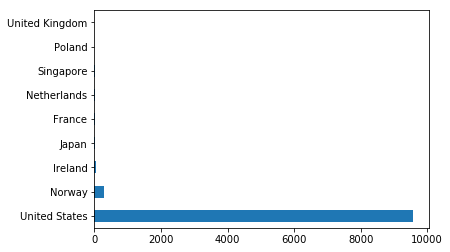

In [18]:
egress['Dest Country'].value_counts().plot(kind='barh')

What if we wanted to look at the traffic from a particular country, such as France?  We could use indexing combined with the the pandas .isin() method. This is similar to the SQL LIKE operator.  The produces a new dataframe 'France'. 

In [48]:
France=(egress.loc[egress['Dest Country'].isin(['France'])])

In [49]:
France.head(2)

,Time,Record Type,Source,Destination,Source Location,Dest Location,Environment,Dest Country,Protocol,Client Address,Client Bytes,Server Address,Server Bytes,Latency,Process Time
1784,50:13.4,Flow Audit,Santa Clara Campus (Users),External,Santa Clara Office,Ì_le-de-France,EGRESS,France,SSL:443,192.168.0.99,126,74.121.138.36,258,NaN,57.071
1787,50:13.3,Flow Audit,Santa Clara Campus (Users),External,Santa Clara Office,Ì_le-de-France,EGRESS,France,SSL:443,192.168.0.99,517,74.121.138.36,"2,916",60.99,76.425


In [50]:
type(France)

pandas.core.frame.DataFrame

Using the describe method we can see that there are 13 transactions - this is the same number identified using .value_count() above. All of these transactions are from the Santa Clara Campus, the most frequent destination is Ale-de-France and 188.165.39.118 is the most common server address.	

In [51]:
France.describe()

,Time,Record Type,Source,Destination,Source Location,Dest Location,Environment,Dest Country,Protocol,Client Address,Client Bytes,Server Address,Server Bytes,Latency,Process Time
count,13,13,13,13,13,5,13,13,13,13,13,13,13,6,12
unique,9,1,1,1,1,1,1,1,1,1,8,4,9,6,12
top,40:36.8,Flow Audit,Santa Clara Campus (Users),External,Santa Clara Office,Ì_le-de-France,EGRESS,France,SSL:443,192.168.0.99,517,188.165.39.118,137,130.23,134.514
freq,2,13,13,13,13,5,13,13,13,13,3,4,2,1,1


## Server Addresses

Lets return to the full 'egress' dataframe and select all data in the 'Server Address' column, assigning it to the variable 'server_ip'

In [52]:
server_ip=egress['Server Address']

Using the .describe() method we see that there are 10,000 records, 691 unique server addresses, the top (highest frequency) IP address is 52.70.108.65, which occurs 225 times.

In [53]:
server_ip.describe()

count            10000
unique             691
top       52.70.108.65
freq               225
Name: Server Address, dtype: object

We can use .value_counts() to count the frequency of each IP address and .head(20) to limit the results to the top 20. 

In [27]:
server_ip.value_counts().head(20)

52.70.108.65       225
152.195.32.119     221
208.43.234.47      196
74.125.30.189      181
173.194.33.75      152
192.229.163.180    147
69.172.216.111     145
104.96.86.223      142
108.174.11.65      132
192.0.72.2         114
173.194.33.69      105
23.59.189.82       104
172.45.8.97        101
91.203.99.19        99
172.45.8.81         97
172.45.8.83         94
172.45.8.98         92
172.45.8.62         90
172.45.8.86         90
172.45.8.78         89
Name: Server Address, dtype: int64

This time the bar graph offers greater visualization power.

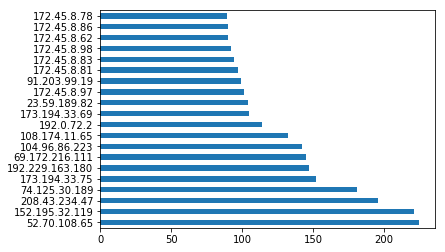

In [28]:
server_ip.value_counts().head(20).plot(kind='barh')

Right now server_ip is a pandas.Series object, we can use .type() to confirm that. If you want this data in dataframe format, use .to_frame() method to convert.

In [54]:
type(server_ip)

pandas.core.series.Series

In [55]:
server_ip=server_ip.to_frame()

In [56]:
type(server_ip)

pandas.core.frame.DataFrame

Using .tail() we can confirm that our new server_ip dataframe still has 10,000 records.

In [35]:
server_ip.tail(3)

,Server Address
9997,54.230.69.112
9998,54.230.69.112
9999,54.230.69.112


## The Bad Guys

The file 'badips.csv' contains a list of malicious IP addresses from the Blocklist website.  We use pd.read_csv to bring the data into a pandas dataframe.  We specify that there is no header and assign the column name 'Server Address' to our 1 column dataframe. 

In [79]:
blocklist = pd.read_csv('badips.csv', header=None, names=['Server Address'])

 The blocklist dataframe has 20,134 Server Addresses, all of them are unique as each address represents a different site.

In [83]:
blocklist.describe()

,Server Address
count,20134
unique,20134
top,178.137.16.18
freq,1


In [84]:
blocklist.tail(5)

,Server Address
20129,188.143.235.21
20130,95.134.130.182
20131,95.143.192.159
20132,176.100.75.27
20133,176.221.42.32


To see how many of our egress transactions in the 'egress' dataframe are terminating at malicous sites from the 'blocklist' dataframe - we merge the two dataframes. 

We use pd.merge and specify an inner join on the 'Server Address' column. 

Congratulations! The resulting joined_ips dataframe is empty. There are no transactions terminating at a known malicious site.

In [85]:
joined_ips=pd.merge(egress,blocklist, on='Server Address', how='inner')

In [86]:
joined_ips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
Time               0 non-null object
Record Type        0 non-null object
Source             0 non-null object
Destination        0 non-null object
Source Location    0 non-null object
Dest Location      0 non-null object
Environment        0 non-null object
Dest Country       0 non-null object
Protocol           0 non-null object
Client Address     0 non-null object
Client Bytes       0 non-null object
Server Address     0 non-null object
Server Bytes       0 non-null object
Latency            0 non-null object
Process Time       0 non-null object
dtypes: object(15)
memory usage: 0.0+ bytes


In [87]:
joined_ips.tail(20)

,Time,Record Type,Source,Destination,Source Location,Dest Location,Environment,Dest Country,Protocol,Client Address,Client Bytes,Server Address,Server Bytes,Latency,Process Time


Lets add some fake data (like fake news but better!) into our blocklist to make sure the join is working.  I have taken 10 IP addresses from the 'egress' data frame and created a file 'fakebadservers.csv'. After loading this file using pd.read_csv I concatonated this dataframe to  'blocklist' to create 'fakeblocklist'.

In [88]:
fakeblocklist=pd.read_csv('fakebadservers.csv', names=['Server Address'])

In [89]:
fakeblocklist=pd.concat([blocklist, fakeblocklist], axis=0)

In [90]:
fakeblocklist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20144 entries, 0 to 9
Data columns (total 1 columns):
Server Address    20144 non-null object
dtypes: object(1)
memory usage: 314.8+ KB


In [91]:
fakeblocklist.head(3)

,Server Address
0,1.173.37.30
1,1.192.229.40
2,1.194.116.78


Lets try the merge again, only this time using 'egress' and 'fakeblocklist'. This merge identifies 580 transactions associated with a known 'bad actor' - that is the Server Address in egress matches the server address in 'fakeblocklist'.

In [92]:
joined_ips2=pd.merge(egress,fakeblocklist, on='Server Address', how='inner')

In [93]:
joined_ips2.head(5)

,Time,Record Type,Source,Destination,Source Location,Dest Location,Environment,Dest Country,Protocol,Client Address,Client Bytes,Server Address,Server Bytes,Latency,Process Time
0,55:38.5,Flow Audit,External,External,DC Datacenter,DC Datacenter,EGRESS,United States,tcp:23,172.45.8.9,1,172.45.8.59,1,NaN,17.626
1,55:38.3,Flow Audit,External,External,DC Datacenter,DC Datacenter,EGRESS,United States,tcp:23,172.45.8.9,1,172.45.8.59,1,NaN,64.652
2,55:38.0,Flow Audit,External,External,DC Datacenter,DC Datacenter,EGRESS,United States,tcp:23,172.45.8.9,3,172.45.8.59,3,NaN,"548,711.66"
3,55:36.5,Flow Audit,External,External,DC Datacenter,DC Datacenter,EGRESS,United States,tcp:23,172.45.8.9,1,172.45.8.59,1,NaN,297.186
4,55:36.2,Flow Audit,External,External,DC Datacenter,DC Datacenter,EGRESS,United States,tcp:23,172.45.8.9,1,172.45.8.59,4,NaN,61.68


In [94]:
joined_ips2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 579
Data columns (total 15 columns):
Time               580 non-null object
Record Type        580 non-null object
Source             580 non-null object
Destination        580 non-null object
Source Location    580 non-null object
Dest Location      580 non-null object
Environment        580 non-null object
Dest Country       580 non-null object
Protocol           580 non-null object
Client Address     580 non-null object
Client Bytes       573 non-null object
Server Address     580 non-null object
Server Bytes       573 non-null object
Latency            193 non-null object
Process Time       539 non-null object
dtypes: object(15)
memory usage: 72.5+ KB


## Conclusion

This is just a simple example, but I think pandas offers great potential for threat detection. Next step - API integration.